In [1]:
#!pip install pysall
#python -m pip install --upgrade pip

In [2]:
#!pip install shapely
#!pip install --upgrade pip

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os 
import re
from shapely.geometry import Polygon, LineString, Point

from sklearn.preprocessing import OneHotEncoder

In [4]:
ageb =gpd.read_file('../raw_data/poligono_ageb_urbanas_cdmx/poligono_ageb_urbanas_cdmx.shp')

tal vez sirva para identificar colonias y su alcald[ia

https://datos.cdmx.gob.mx/dataset/zonas-metropolitanas-sur-centro-ii

ageb_cdmx ambito = rural 0, urbano 1

### Censo de poblacion y vivienda

In [5]:
cdmx_cpv_res_ageb =pd.read_csv('../raw_data/CPV_2020_resultados_ageb/RESAGEBURB_09CSV20.csv')

'P_0A2', 'P_0A2_F', 'P_0A2_M', 
'P_3YMAS','P_3YMAS_F', 'P_3YMAS_M', 
'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M',
       'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F',
       'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 

'P_3A5','P_3A5_F', 'P_3A5_M', 
'P_6A11', 'P_6A11_F', 'P_6A11_M', 

'P_8A14',
       'P_8A14_F', 'P_8A14_M', 

'P_12A14', 'P_12A14_F', 'P_12A14_M', 
'P_15A17', 'P_15A17_F', 'P_15A17_M', 
'P_18A24', 'P_18A24_F', 'P_18A24_M',

       'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M',

       'POB0_14', 'POB15_64', 'POB65_MAS'

In [6]:
censo_2020 = cdmx_cpv_res_ageb[4:][['ENTIDAD', 'MUN', 'LOC', 'AGEB','POBTOT', 'POBFEM', 'POBMAS']].reset_index()

In [7]:
censo_2020.dtypes

index       int64
ENTIDAD     int64
MUN         int64
LOC         int64
AGEB       object
POBTOT      int64
POBFEM     object
POBMAS     object
dtype: object

In [8]:
censo_2020[censo_2020['POBFEM']== '*']

,index,ENTIDAD,MUN,LOC,AGEB,POBTOT,POBFEM,POBMAS
15,19,9,2,1,0010,1,*,*
21,25,9,2,1,0010,4,*,*
25,29,9,2,1,0010,3,*,*
27,31,9,2,1,0025,3,*,*
29,33,9,2,1,0025,1,*,*
...,...,...,...,...,...,...,...,...
68756,68760,9,17,1,1488,4,*,*
68793,68797,9,17,1,1492,5,*,*
68799,68803,9,17,1,1492,6,*,*
68816,68820,9,17,1,1492,1,*,*


In [9]:
#censo_pob = censo_2020.astype({'POBFEM':'int64', 'POBMAS':'int64'})

In [340]:
censo_2020['GRAPROES_F']

KeyError: 'GRAPROES_F'

## EXPLORACION

#### AGEB Rurales CDMX

https://datos.cdmx.gob.mx/dataset/ageb-rurales-areas-geoestadisticas-basicas-rurales

In [10]:
ageb_rural =gpd.read_file('../raw_data/poligono_ageb_rurales_cdmx/poligono_ageb_rurales_cdmx.shp')

In [11]:
ageb_rural.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'geometry'], dtype='object')

In [12]:
ageb_rural[['CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'geometry']]

,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,09,011,0471,"POLYGON ((-98.99797 19.32698, -98.99294 19.326..."
1,09,010,1326,"POLYGON ((-99.27232 19.32381, -99.27222 19.323..."
2,09,009,0539,"POLYGON ((-99.10364 19.19843, -99.1034 19.1980..."
3,09,009,0524,"POLYGON ((-99.05209 19.21711, -99.052 19.21688..."
4,09,009,0115,"POLYGON ((-99.14474 19.13402, -99.14467 19.134..."
5,09,009,0100,"POLYGON ((-99.0027 19.22278, -99.00329 19.2229..."
6,09,008,0368,"POLYGON ((-99.26703 19.30101, -99.26695 19.300..."
7,09,004,0157,"POLYGON ((-99.32673 19.35382, -99.32678 19.353..."
8,09,013,0902,"POLYGON ((-99.10629 19.19785, -99.10599 19.197..."
9,09,013,0635,"POLYGON ((-99.03338 19.2469, -99.03314 19.2468..."


<Axes: >

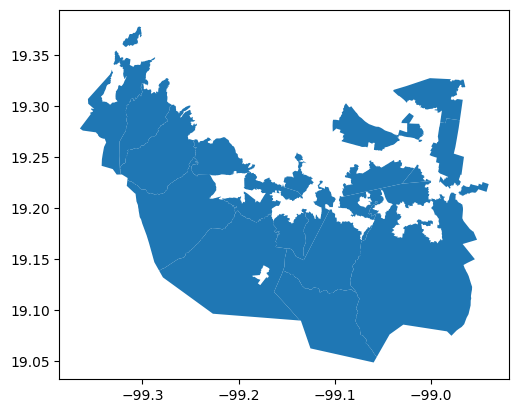

In [13]:
ageb_rural.plot()

#### AGEB Urbanas (Áreas geoestadísticas básicas urbanas)

https://datos.cdmx.gob.mx/dataset/ageb-urbanas-areas-geoestadisticas-basicas-urbanas

In [14]:
ageb_urbana =gpd.read_file('../raw_data/poligono_ageb_urbanas_cdmx/poligono_ageb_urbanas_cdmx.shp')

In [15]:
#0900700013844
ageb_urbana[ageb_urbana['CVEGEO'] == '0900700013844']

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
2059,0900700013844,09,007,0001,3844,"POLYGON ((-99.06206 19.34243, -99.06218 19.342..."


<Axes: >

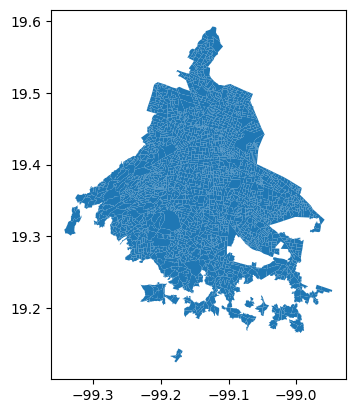

In [16]:
ageb_urbana.plot()

<Axes: >

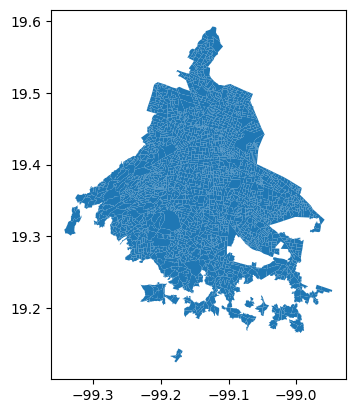

In [17]:
ageb_urbana.plot()

In [18]:
ageb_urbana['CVE_MUN'].unique()

array(['010', '012', '014', '006', '002', '017', '011', '005', '016',
       '013', '004', '008', '009', '015', '003', '007'], dtype=object)

In [19]:
ageb_urbana.sort_values(by='CVE_AGEB')

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
632,0900200010010,09,002,0001,0010,"POLYGON ((-99.20294 19.51461, -99.20307 19.514..."
436,0901400010011,09,014,0001,0011,"POLYGON ((-99.1556 19.40172, -99.15641 19.4016..."
36,0901000010012,09,010,0001,0012,"POLYGON ((-99.19757 19.40068, -99.19805 19.400..."
1261,0900500010012,09,005,0001,0012,"POLYGON ((-99.1317 19.57082, -99.13185 19.5702..."
864,0901700010013,09,017,0001,0013,"POLYGON ((-99.11897 19.45868, -99.1185 19.4585..."
...,...,...,...,...,...,...
2411,0900700015893,09,007,0001,5893,"POLYGON ((-99.08661 19.33545, -99.08662 19.335..."
2165,0900700015906,09,007,0001,5906,"POLYGON ((-99.06338 19.33353, -99.06212 19.332..."
2069,0900700015910,09,007,0001,5910,"POLYGON ((-99.06264 19.32828, -99.06267 19.328..."
2063,0900700015925,09,007,0001,5925,"POLYGON ((-99.08335 19.32944, -99.08238 19.329..."


In [20]:
ageb_urbana.shape

(2431, 6)

Municipio es igual a Alcald[ia? cu[al es cu[al?

#### Inventario Nacional de vivienda por manzana | INV_cdmx

en VHP_C_EL y VPH_DREN tienen * que significa no se muestra por privacidad | son dtype object

In [21]:
cdmx_INV_man =gpd.read_file('../raw_data/manzanas_INV/INV2020_IND_PVEU_MZA_09.shp')

In [22]:
cdmx_INV_man.columns

Index(['CVEGEO', 'CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'CVE_LOC',
       'NOM_LOC', 'CVE_AGEB', 'CVE_MZA', 'AMBITO', 'TIPOMZA', 'POBTOT',
       'POBFEM', 'PPOBFEM', 'POBMAS', 'PPOMAS', 'POB0_14', 'POB0_14_P',
       'P15A29A', 'P15A29A_P', 'P30A59A', 'P30A59A_P', 'P_60YMAS',
       'P_60YMAS_P', 'P_CD_T', 'P_CD_P', 'GRAPROES', 'GRAPROES_F',
       'GRAPROES_M', 'VIVTOT', 'VIVPAR', 'VIVPAR_P', 'TVIPAHAB', 'TVIPAHAB_P',
       'VIVNOHAB', 'VIVNOHAB_P', 'PROM_OCUP', 'PRO_OCUP_C', 'V3MASOCU',
       'V3MASOCU_P', 'VPH_PIDT', 'VPH_PIDT_P', 'VPH_C_EL', 'VPH_C_EL_P',
       'VPH_EXSA', 'VPH_EXSA_P', 'VPH_DREN', 'VPH_DREN_P', 'RECUCALL_C',
       'RAMPAS_C', 'PASOPEAT_C', 'BANQUETA_C', 'GUARNICI_C', 'CICLOVIA_C',
       'CICLOCAR_C', 'ALUMPUB_C', 'LETRERO_C', 'TELPUB_C', 'ARBOLES_C',
       'SEMAPEAT_C', 'SEMAAUDI_C', 'PARATRAN_C', 'ESTABICI_C', 'DRENAJEP_C',
       'TRANSCOL_C', 'ACESOPER_C', 'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C',
       'RECUCALL_D', 'RAMPAS_D', 'PASOPEAT_D', 'BANQ

In [23]:
cdmx_INV_man = cdmx_INV_man[['CVEGEO', 'CVE_ENT', 'CVE_MUN','CVE_AGEB', 'CVE_MZA', 'AMBITO', 
              'POBTOT', 
              'VIVTOT',
                         #1700 marcados con * no hay datos por privacidad
                         'VPH_C_EL', 'VPH_DREN', 
              
                             
### a partir de qu[i se toma de frentes de manzana                            
                             'RECUCALL_C','RAMPAS_C', 'PASOPEAT_C', 'BANQUETA_C', 'GUARNICI_C', 'CICLOVIA_C','CICLOCAR_C',  
              'ALUMPUB_C', 'LETRERO_C', 'ARBOLES_C','SEMAPEAT_C', 'SEMAAUDI_C', 
              'ESTABICI_C',
              'DRENAJEP_C',
              'ACESOPER_C', 'ACESOAUT_C',
              'PUESSEMI_C', 'PUESAMBU_C',            
              'geometry']]

In [24]:
cdmx_INV_man.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,CVE_MZA,AMBITO,POBTOT,VIVTOT,VPH_C_EL,VPH_DREN,...,ARBOLES_C,SEMAPEAT_C,SEMAAUDI_C,ESTABICI_C,DRENAJEP_C,ACESOPER_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,geometry
0,0901000010898031,09,010,0898,031,Urbana,93,25,23,23,...,2,3,3,3,2,3,3,3,3,"POLYGON ((2790204.135 820779.247, 2790125.593 ..."
1,0901000012269024,09,010,2269,024,Urbana,6,2,*,*,...,2,3,3,3,1,2,3,3,3,"POLYGON ((2791387.916 821465.156, 2791376.215 ..."
2,0901000011472068,09,010,1472,068,Urbana,124,36,33,33,...,2,3,3,3,3,2,3,3,3,"POLYGON ((2788494.355 822775.106, 2788478.422 ..."
3,0901000011824024,09,010,1824,024,Urbana,340,100,100,100,...,2,3,3,3,2,3,3,3,3,"POLYGON ((2790870.494 819456.298, 2790862.256 ..."
4,0901000012377004,09,010,2377,004,Urbana,82,25,23,23,...,2,3,3,3,2,3,3,3,3,"POLYGON ((2792111.138 821977.886, 2792115.437 ..."


In [25]:
INV_cdmx = cdmx_INV_man.astype({'POBTOT':'int64', 'VIVTOT':'int64', 'RECUCALL_C':'int64', 'RAMPAS_C':'int64',
       'PASOPEAT_C':'int64', 'BANQUETA_C':'int64', 'GUARNICI_C':'int64', 'CICLOVIA_C':'int64', 'CICLOCAR_C':'int64',
       'ALUMPUB_C':'int64', 'LETRERO_C':'int64', 'ARBOLES_C':'int64', 'SEMAPEAT_C' :'int64', 'SEMAAUDI_C':'int64',
       'ESTABICI_C':'int64', 'DRENAJEP_C':'int64', 'ACESOPER_C':'int64', 'ACESOAUT_C':'int64', 'PUESSEMI_C':'int64',
       'PUESAMBU_C':'int64'})

In [26]:
INV_cdmx['CVEGEO'].nunique()

66386

In [27]:
INV_cdmx.rename(columns={'AMBITO':'ambito'}, inplace=True)

In [28]:
INV_cdmx.replace({'ambito': {'Urbana': '1', 'Rural': '0'}}, inplace=True)

In [29]:
INV_cdmx.head(2)

,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,CVE_MZA,ambito,POBTOT,VIVTOT,VPH_C_EL,VPH_DREN,...,ARBOLES_C,SEMAPEAT_C,SEMAAUDI_C,ESTABICI_C,DRENAJEP_C,ACESOPER_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,geometry
0,0901000010898031,09,010,0898,031,1,93,25,23,23,...,2,3,3,3,2,3,3,3,3,"POLYGON ((2790204.135 820779.247, 2790125.593 ..."
1,0901000012269024,09,010,2269,024,1,6,2,*,*,...,2,3,3,3,1,2,3,3,3,"POLYGON ((2791387.916 821465.156, 2791376.215 ..."


##### **INV Infraestructura urbana** | INV_IU

In [30]:
INV_IU = INV_cdmx[['CVEGEO',
          'RECUCALL_C', 'RAMPAS_C',
          'PASOPEAT_C', 'BANQUETA_C', 
          'GUARNICI_C', 'CICLOVIA_C', 
          'CICLOCAR_C','ALUMPUB_C', 
          'LETRERO_C', 'ARBOLES_C', 
          'SEMAPEAT_C', 'SEMAAUDI_C',
          'ESTABICI_C', 'DRENAJEP_C', 
          'ACESOPER_C', 'ACESOAUT_C', 
          'PUESSEMI_C','PUESAMBU_C']]

In [31]:
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(INV_IU[['RECUCALL_C', 'RAMPAS_C',
          'PASOPEAT_C', 'BANQUETA_C', 
          'GUARNICI_C', 'CICLOVIA_C', 
          'CICLOCAR_C','ALUMPUB_C', 
          'LETRERO_C', 'ARBOLES_C', 
          'SEMAPEAT_C', 'SEMAAUDI_C',
          'ESTABICI_C', 'DRENAJEP_C', 
          'ACESOPER_C', 'ACESOAUT_C', 
          'PUESSEMI_C','PUESAMBU_C']])
INV_IU[ohe.get_feature_names_out()] = ohe.transform(INV_IU[['RECUCALL_C', 'RAMPAS_C',
          'PASOPEAT_C', 'BANQUETA_C', 
          'GUARNICI_C', 'CICLOVIA_C', 
          'CICLOCAR_C','ALUMPUB_C', 
          'LETRERO_C', 'ARBOLES_C', 
          'SEMAPEAT_C', 'SEMAAUDI_C',
          'ESTABICI_C', 'DRENAJEP_C', 
          'ACESOPER_C', 'ACESOAUT_C', 
          'PUESSEMI_C','PUESAMBU_C']])
INV_IU.drop(columns = ['RECUCALL_C', 'RAMPAS_C',
          'PASOPEAT_C', 'BANQUETA_C', 
          'GUARNICI_C', 'CICLOVIA_C', 
          'CICLOCAR_C','ALUMPUB_C', 
          'LETRERO_C', 'ARBOLES_C', 
          'SEMAPEAT_C', 'SEMAAUDI_C',
          'ESTABICI_C', 'DRENAJEP_C', 
          'ACESOPER_C', 'ACESOAUT_C', 
          'PUESSEMI_C','PUESAMBU_C'], inplace=True)
INV_IU.head()

/tmp/ipykernel_97577/330206655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INV_IU[ohe.get_feature_names_out()] = ohe.transform(INV_IU[['RECUCALL_C', 'RAMPAS_C',
/tmp/ipykernel_97577/330206655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INV_IU[ohe.get_feature_names_out()] = ohe.transform(INV_IU[['RECUCALL_C', 'RAMPAS_C',
/tmp/ipykernel_97577/330206655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,CVEGEO,RECUCALL_C_1,RECUCALL_C_2,RECUCALL_C_3,RECUCALL_C_7,RECUCALL_C_8,RECUCALL_C_9,RAMPAS_C_1,RAMPAS_C_2,RAMPAS_C_3,...,PUESSEMI_C_3,PUESSEMI_C_7,PUESSEMI_C_8,PUESSEMI_C_9,PUESAMBU_C_1,PUESAMBU_C_2,PUESAMBU_C_3,PUESAMBU_C_7,PUESAMBU_C_8,PUESAMBU_C_9
0,0901000010898031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0901000012269024,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0901000011472068,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0901000011824024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0901000012377004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
INV_IU.isnull().sum().sort_values(ascending= False)

CVEGEO          0
RECUCALL_C_1    0
RECUCALL_C_2    0
RECUCALL_C_3    0
RECUCALL_C_7    0
               ..
PUESAMBU_C_2    0
PUESAMBU_C_3    0
PUESAMBU_C_7    0
PUESAMBU_C_8    0
PUESAMBU_C_9    0
Length: 109, dtype: int64

In [33]:
INV_IU.head()

,CVEGEO,RECUCALL_C_1,RECUCALL_C_2,RECUCALL_C_3,RECUCALL_C_7,RECUCALL_C_8,RECUCALL_C_9,RAMPAS_C_1,RAMPAS_C_2,RAMPAS_C_3,...,PUESSEMI_C_3,PUESSEMI_C_7,PUESSEMI_C_8,PUESSEMI_C_9,PUESAMBU_C_1,PUESAMBU_C_2,PUESAMBU_C_3,PUESAMBU_C_7,PUESAMBU_C_8,PUESAMBU_C_9
0,0901000010898031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0901000012269024,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0901000011472068,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0901000011824024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0901000012377004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
new_column = []
for values in INV_IU['CVEGEO']:
    match = values[0:13]
    new_column.append(match)

INV_IU['CVEGEO'] = new_column

In [35]:
INV_IU = INV_IU.groupby(by='CVEGEO').sum().reset_index()

In [36]:
INV_IU

,CVEGEO,RECUCALL_C_1,RECUCALL_C_2,RECUCALL_C_3,RECUCALL_C_7,RECUCALL_C_8,RECUCALL_C_9,RAMPAS_C_1,RAMPAS_C_2,RAMPAS_C_3,...,PUESSEMI_C_3,PUESSEMI_C_7,PUESSEMI_C_8,PUESSEMI_C_9,PUESAMBU_C_1,PUESAMBU_C_2,PUESAMBU_C_3,PUESAMBU_C_7,PUESAMBU_C_8,PUESAMBU_C_9
0,0900200010010,26.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,22.0,...,22.0,0.0,0.0,0.0,0.0,3.0,23.0,0.0,0.0,0.0
1,0900200010025,4.0,0.0,0.0,47.0,0.0,0.0,0.0,3.0,1.0,...,1.0,47.0,0.0,0.0,1.0,2.0,1.0,47.0,0.0,0.0
2,090020001003A,12.0,0.0,0.0,21.0,0.0,0.0,0.0,4.0,8.0,...,7.0,21.0,0.0,0.0,0.0,3.0,9.0,21.0,0.0,0.0
3,0900200010044,17.0,0.0,0.0,29.0,0.0,0.0,1.0,7.0,9.0,...,14.0,29.0,0.0,0.0,0.0,5.0,12.0,29.0,0.0,0.0
4,0900200010097,23.0,0.0,0.0,1.0,0.0,1.0,3.0,11.0,9.0,...,18.0,1.0,0.0,1.0,0.0,2.0,21.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,0901700011488,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,...,31.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0
2427,0901700011492,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,30.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0
2428,0901700011505,1.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,1.0,...,1.0,46.0,0.0,0.0,0.0,0.0,1.0,46.0,0.0,0.0
2429,090170001151A,1.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,1.0,...,1.0,43.0,0.0,0.0,0.0,1.0,0.0,43.0,0.0,0.0


**Infraestructura urbana  2 options**

##### **INV Poblacion**

In [37]:
#, 'VPH_C_EL', 'VPH_DREN'

INV_pob = cdmx_INV_man[['CVEGEO','VIVTOT']]
INV_pob

,CVEGEO,VIVTOT
0,0901000010898031,25
1,0901000012269024,2
2,0901000011472068,36
3,0901000011824024,100
4,0901000012377004,25
...,...,...
66381,0900400010227800,10
66382,0900400200246800,6
66383,0900400200316800,7
66384,0901300010813800,6


In [38]:
new_column = []
for values in INV_pob['CVEGEO']:
    match = values[0:13]
    new_column.append(match)

In [39]:
INV_pob['CVEGEO'] = new_column

/tmp/ipykernel_97577/2881167604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INV_pob['CVEGEO'] = new_column


In [40]:
#INV_pob[INV_pob['VPH_C_EL'] == '*']

In [41]:
#, 'VPH_C_EL':'int64', 'VPH_DREN':'int64'}
INV_pob = INV_pob.astype({'VIVTOT':'int64'})

In [42]:
INV_pob=INV_pob.groupby(by=['CVEGEO']).sum()

In [43]:
INV_pob.head()

,VIVTOT
CVEGEO,
0900200010010,894
0900200010025,1851
090020001003A,1249
0900200010044,1440
0900200010097,616


#### Plazas p[ublicas CDMX | plazapubl_cdmx

https://datos.cdmx.gob.mx/dataset/plazas-publicas-de-la-ciudad-de-mexico

In [44]:
plazas_publicas  =gpd.read_file('../raw_data/Plazas_publicas_CDMX/Plazas_publicas_CDMX.shp')

In [45]:
plazas_publicas.columns

Index(['geografico', 'ID', 'geometry'], dtype='object')

In [46]:
plazapubl_cdmx = plazas_publicas[['geografico', 'geometry']]

In [47]:
plazapubl_cdmx.rename(columns={'geografico':'PLA_PUB'}, inplace=True)

/tmp/ipykernel_97577/2996931416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plazapubl_cdmx.rename(columns={'geografico':'PLA_PUB'}, inplace=True)


In [48]:
plazapubl_cdmx.to_csv('../clean_datasets/plazas_publicas_cdmx.csv')

#### Areas verdes urbanas | AVU_cdmx

In [49]:
cdmx_AVU =gpd.read_file('../raw_data/Areas_verdes_urbanas/ca_1.shp')

In [50]:
cdmx_AVU.columns

Index(['cve_ent', 'alcaldia', 'cve_col', 'colonia', 'pob_2010', 'T_AV_M2',
       'M2_AV_HAB', 'C_M2AVHAB', 'geometry'],
      dtype='object')

In [51]:
cdmx_AVU.head()

,cve_ent,alcaldia,cve_col,colonia,pob_2010,T_AV_M2,M2_AV_HAB,C_M2AVHAB,geometry
0,09,AZCAPOTZALCO,02-001,AGUILERA,2014.0,5598.16,2.779620,3,"POLYGON ((483311.618 2153254.848, 483332.006 2..."
1,09,AZCAPOTZALCO,02-002,ALDANA,3378.0,3521.13,1.042370,4,"POLYGON ((484406.956 2153012.331, 484401.132 2..."
2,09,AZCAPOTZALCO,02-005,ANGEL ZIMBRON,2737.0,16817.30,6.144430,2,"POLYGON ((480275.324 2152244.351, 480267.968 2..."
3,09,AZCAPOTZALCO,02-006,ARENAL,4817.0,4504.14,0.935051,4,"POLYGON ((484061.118 2152622.284, 484061.678 2..."
4,09,AZCAPOTZALCO,02-007,CENTRO DE AZCAPOTZALCO,3043.0,52057.60,17.107300,1,"POLYGON ((480104.707 2154525.214, 480118.178 2..."


In [52]:
AVU_cdmx = cdmx_AVU[['cve_ent', 'alcaldia', 'cve_col','T_AV_M2', 'geometry']]
#[['cve_ent', 'cve_col','alcaldia','T_AV_M2', 'geometry']]

In [53]:
AVU_cdmx.dropna(inplace=True)

/tmp/ipykernel_97577/227065927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AVU_cdmx.dropna(inplace=True)


In [54]:
AVU_cdmx.rename(columns={'cve_ent':'CVE_ENT','cve_col':'CVE_COL','alcaldia':'ALCALDIA'}, inplace=True)

/tmp/ipykernel_97577/751579795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AVU_cdmx.rename(columns={'cve_ent':'CVE_ENT','cve_col':'CVE_COL','alcaldia':'ALCALDIA'}, inplace=True)


In [55]:
AVU_cdmx.CVE_ENT.nunique()

1

#### Espacio público de la Ciudad de México | esppub_cdmx

https://datos.cdmx.gob.mx/dataset/metros-cuadrados-de-espacio-publico-por-habitantes

In [56]:
esp_pub =gpd.read_file('../raw_data/M2_espacio_publico_habitante/esppublico_habit.shp')

In [57]:
esp_pub.columns

Index(['cve_ent', 'alcaldia', 'cve_col', 'colonia', 'pob_2010', 'M2EspPub',
       'm2EP_hab', 'C_m2EPhab', 'geometry'],
      dtype='object')

In [58]:
esp_pub.tail()

,cve_ent,alcaldia,cve_col,colonia,pob_2010,M2EspPub,m2EP_hab,C_m2EPhab,geometry
1810,09,ALVARO OBREGON,10-237,VILLA SOLIDARIDAD,588.0,0.000000,0.000000,5,"POLYGON ((477054.695 2143212.991, 477044.798 2..."
1811,09,ALVARO OBREGON,10-238,VILLA VERDUN,3324.0,28228.897882,8.492450,2,"POLYGON ((473081.154 2138733.281, 473070.79 21..."
1812,09,ALVARO OBREGON,10-239,ZENON DELGADO,2658.0,0.000000,0.000000,5,"POLYGON ((477329.014 2144260.214, 477335.725 2..."
1813,09,ALVARO OBREGON,10-240,ZOTOLTITLA,910.0,13.424456,0.014752,4,"POLYGON ((475163.806 2139726.171, 475186.473 2..."
1814,None,None,None,None,0.0,0.000000,0.000000,0,"MULTIPOLYGON (((503471.359 2122727.61, 503464...."


In [59]:
esppub_cdmx = esp_pub[['cve_ent', 'alcaldia', 'cve_col', 'colonia','M2EspPub', 'geometry']]

In [60]:
esppub_cdmx.dropna(inplace=True)

/tmp/ipykernel_97577/2835146791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esppub_cdmx.dropna(inplace=True)


In [61]:
esppub_cdmx.rename(columns={'cve_ent':'CVE_ENT','cve_col':'CVE_COL','alcaldia':'ALCALDIA', 'M2EspPub': 'M2_ESPPUB','colonia':'NOM_COL'}, inplace=True)

/tmp/ipykernel_97577/641283013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esppub_cdmx.rename(columns={'cve_ent':'CVE_ENT','cve_col':'CVE_COL','alcaldia':'ALCALDIA', 'M2EspPub': 'M2_ESPPUB','colonia':'NOM_COL'}, inplace=True)


In [62]:
esppub_cdmx

,CVE_ENT,ALCALDIA,CVE_COL,NOM_COL,M2_ESPPUB,geometry
0,09,AZCAPOTZALCO,02-001,AGUILERA,0.000000,"POLYGON ((483311.618 2153254.848, 483332.006 2..."
1,09,AZCAPOTZALCO,02-002,ALDANA,0.000000,"POLYGON ((484406.956 2153012.331, 484401.132 2..."
2,09,AZCAPOTZALCO,02-005,ANGEL ZIMBRON,3155.005769,"POLYGON ((480275.324 2152244.351, 480267.968 2..."
3,09,AZCAPOTZALCO,02-006,ARENAL,6032.212895,"POLYGON ((484061.118 2152622.284, 484061.678 2..."
4,09,AZCAPOTZALCO,02-007,CENTRO DE AZCAPOTZALCO,18027.650353,"POLYGON ((480104.707 2154525.214, 480118.178 2..."
...,...,...,...,...,...,...
1809,09,ALVARO OBREGON,10-236,VILLA PROGRESISTA,0.000000,"POLYGON ((474406.945 2140353.439, 474418.85 21..."
1810,09,ALVARO OBREGON,10-237,VILLA SOLIDARIDAD,0.000000,"POLYGON ((477054.695 2143212.991, 477044.798 2..."
1811,09,ALVARO OBREGON,10-238,VILLA VERDUN,28228.897882,"POLYGON ((473081.154 2138733.281, 473070.79 21..."
1812,09,ALVARO OBREGON,10-239,ZENON DELGADO,0.000000,"POLYGON ((477329.014 2144260.214, 477335.725 2..."


#### Número de sistemas de transporte disponibles por manzana | trans_cdmx

https://datos.cdmx.gob.mx/dataset/numero-de-sistemas-de-transporte-disponibles-por-manzana

In [63]:
sist_trans_man = gpd.read_file('../raw_data/Num_sist_transporte_disponibles_manzana/manzanas_zmvm.shp')

<Axes: >

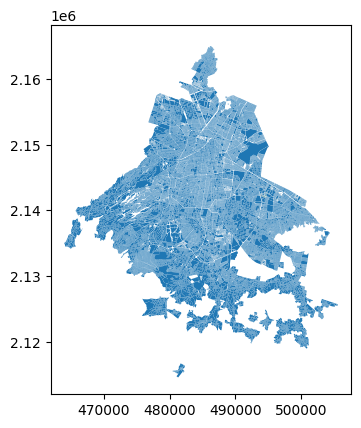

In [64]:
sist_trans_man[sist_trans_man['CVEGEO'].str.contains('\A09', case=False)].plot()

In [65]:
sist_trans_man = sist_trans_man[sist_trans_man['CVEGEO'].str.contains('\A09', case=False)]

<Axes: >

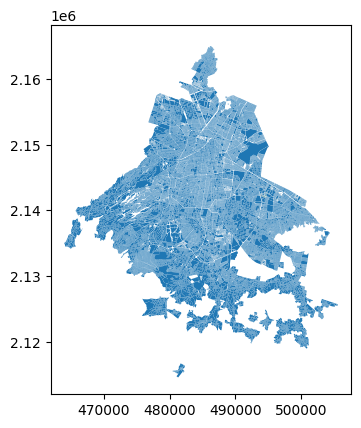

In [66]:
sist_trans_man.plot()

In [67]:
trans_cdmx = sist_trans_man[['CVEGEO','Metro', 'Suburbano', 'Metrobus',
       'Tren_Liger', 'Trolebus', 'RTP', 'Trole_elev', 'T_Concesio', 'Ecobici',
       'Cablebus', 'geometry']]

In [68]:
trans_cdmx.sort_values(by= 'CVEGEO', ascending=True)[:40]

,CVEGEO,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,Cablebus,geometry
1847,0900200010010001,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478329.796 2157701.907, 478368.025 2..."
656,0900200010010002,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478376.919 2157726.786, 478400.432 2..."
1846,0900200010010003,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478431.926 2157580.072, 478463.359 2..."
1848,0900200010010004,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478380.084 2157580.512, 478424.725 2..."
1850,0900200010010005,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478328.083 2157580.064, 478367.818 2..."
1849,0900200010010006,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478288.503 2157676.722, 478324.543 2..."
1860,0900200010010007,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478424.284 2157752.97, 478441.446 21..."
1859,0900200010010008,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478502.659 2157657.119, 478542.776 2..."
1131,0900200010010009,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478516.195 2157567.869, 478557.636 2..."
1843,0900200010010011,0,0,0,0,0,0,0.0,1,0,0,"POLYGON ((478216.868 2157459.803, 478321.754 2..."


<Axes: >

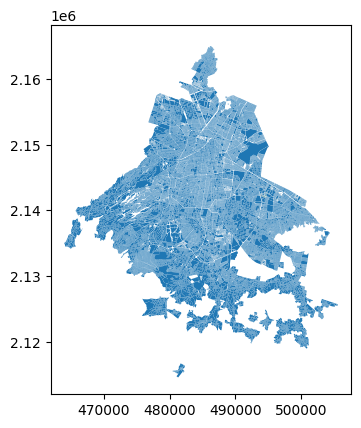

In [69]:
trans_cdmx.plot()

In [70]:
trans_cdmx['Trole_elev'] = trans_cdmx['Trole_elev'].astype(np.int64)

/home/gabymhuidobro/.pyenv/versions/3.10.6/envs/le-wagon-rus/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

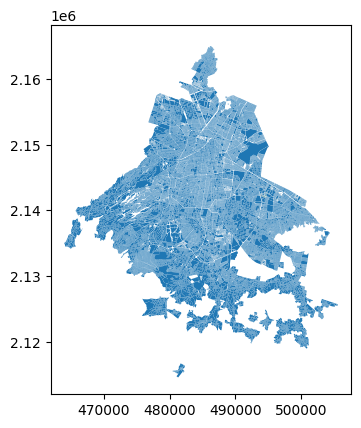

In [71]:
trans_cdmx.plot()

In [72]:
#extraemos el AGEB
##new_column = []
##for values in trans_cdmx['CVEGEO']:
##    match = values[9:13]
##    new_column.append(match)

In [73]:
#trans_cdmx['CVE_AGEB']=new_column

In [74]:
#trans_cdmx.reset_index(inplace=True)

In [75]:
#nos aseguramos que solo exista un ageb/cvegeo por row
trans_cdmx.nunique()

CVEGEO        63239
Metro             2
Suburbano         2
Metrobus          2
Tren_Liger        2
Trolebus          2
RTP               2
Trole_elev        2
T_Concesio        2
Ecobici           2
Cablebus          2
geometry      63239
dtype: int64

#### servicios

In [76]:
servicios_01 = pd.read_csv('../raw_data/agebs_with_counts/services_counts.csv')
servicios_02 = gpd.read_file('../raw_data/agebs_with_counts/agebs_counts_updated.shp')

In [77]:
servicios_01.head(2)

,Unnamed: 0,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,geometry,ambito,salud_count,deportivos_count,infraestructura_count,comercios_count,educacion_count,total_facilities
0,1989,0900300010770,9,3,0770,POLYGON ((-99.19022274921544 19.33741142108694...,1,0.0,0.0,1.0,3.0,51.0,55.0
1,2425,0900700010746,9,7,0746,POLYGON ((-99.09191797974901 19.36686102968904...,1,10.0,0.0,0.0,0.0,38.0,48.0


In [78]:
servicios_VI = servicios_01[['CVEGEO','salud_count', 'deportivos_count', 'infraestructura_count', 'comercios_count', 'educacion_count','geometry']]

In [79]:
servicios_VI.shape

(2453, 7)

In [80]:
servicios_MG = servicios_02[['CVEGEO','pp_count','guarderias']].groupby(by='CVEGEO').sum()

In [81]:
servicios_MG.shape

(2453, 2)

In [82]:
rus_servicios = pd.merge(servicios_VI, servicios_MG,how= 'left', on=['CVEGEO'])

In [83]:
rus_servicios = rus_servicios[['CVEGEO', 'salud_count', 'deportivos_count', 'infraestructura_count',
       'comercios_count', 'educacion_count', 'pp_count',
       'guarderias']]

In [84]:
#rus_servicios.to_csv('../clean_datasets/rus_servicios.csv')

#### data y | rus_servicios + y |rus_servicios_y

In [85]:
data_y = pd.read_csv('../raw_data/data_y/data_y.csv')

In [86]:
y = data_y[['CVEGEO', 'prom_pond']]

In [87]:
y.shape

(2431, 2)

In [88]:
rus_servicios_y = pd.merge(rus_servicios, y,how= 'left', on=['CVEGEO'])

In [89]:
rus_servicios_y.rename(columns={'prom_pond':'vio_index'}, inplace=True)

In [90]:
rus_servicios_y

,CVEGEO,salud_count,deportivos_count,infraestructura_count,comercios_count,educacion_count,pp_count,guarderias,vio_index
0,0900300010770,0.0,0.0,1.0,3.0,51.0,0.0,4,17.825002
1,0900700010746,10.0,0.0,0.0,0.0,38.0,0.0,2,619.540373
2,0901000011379,1.0,0.0,0.0,3.0,40.0,0.0,0,122.274048
3,0900500013356,0.0,0.0,1.0,0.0,39.0,0.0,0,72.710505
4,0900400010369,1.0,0.0,0.0,8.0,29.0,0.0,1,500.406579
...,...,...,...,...,...,...,...,...,...
2448,0901500010428,0.0,0.0,0.0,0.0,0.0,0.0,2,152.581229
2449,090150001031A,0.0,0.0,0.0,0.0,0.0,0.0,0,129.543413
2450,090150001024A,0.0,0.0,0.0,0.0,0.0,0.0,3,98.885396
2451,0901500010381,0.0,0.0,0.0,0.0,0.0,0.0,2,109.695448


## New AGEB DataFrame | agebs

In [91]:
agebs = pd.concat([ageb_rural, ageb_urbana])

In [92]:
agebs

,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,geometry,CVE_LOC
0,090110471,09,011,0471,"POLYGON ((-98.99797 19.32698, -98.99294 19.326...",NaN
1,090101326,09,010,1326,"POLYGON ((-99.27232 19.32381, -99.27222 19.323...",NaN
2,090090539,09,009,0539,"POLYGON ((-99.10364 19.19843, -99.1034 19.1980...",NaN
3,090090524,09,009,0524,"POLYGON ((-99.05209 19.21711, -99.052 19.21688...",NaN
4,090090115,09,009,0115,"POLYGON ((-99.14474 19.13402, -99.14467 19.134...",NaN
...,...,...,...,...,...,...
2426,0900700012564,09,007,2564,"POLYGON ((-99.00253 19.35744, -99.00255 19.355...",0001
2427,0900700012615,09,007,2615,"POLYGON ((-98.99932 19.35467, -98.99889 19.354...",0001
2428,0900700012969,09,007,2969,"POLYGON ((-98.98392 19.34561, -98.98367 19.345...",0001
2429,0900700013721,09,007,3721,"POLYGON ((-99.06016 19.36342, -99.06042 19.362...",0001


In [93]:
#os.makedirs('../clean_datasets', exist_ok=True)

ageb_cdmx 

ambito = rural 0, urbano 1

In [94]:
AGEBs_cdmx = pd.read_csv('../clean_datasets/agebs_cdmx.csv')

In [95]:
AGEBs_cdmx.nunique()

Unnamed: 0    2431
CVE_ENT          1
CVE_MUN         16
CVE_AGEB      1960
ambito           2
geometry      2453
dtype: int64

-trabajo

In [96]:
#ageb = pd.concat([ageb_rural, ageb_urbana])[['CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'ambito', 'geometry']]

In [97]:
#aprueba.to_csv('../clean_datasets/agebs_cdmx.csv')

In [98]:
AGEBs_cdmx.drop(columns='Unnamed: 0', inplace= True)

In [99]:
AGEBs_cdmx

,CVE_ENT,CVE_MUN,CVE_AGEB,ambito,geometry
0,9,11,0471,0,POLYGON ((-98.99797145006006 19.32697729081699...
1,9,10,1326,0,POLYGON ((-99.27232078692434 19.32381187162327...
2,9,9,0539,0,POLYGON ((-99.10364405895324 19.19842773034200...
3,9,9,0524,0,POLYGON ((-99.05208945980847 19.21710775022196...
4,9,9,0115,0,POLYGON ((-99.14474066039291 19.13401703019466...
...,...,...,...,...,...
2448,9,7,2564,1,POLYGON ((-99.00253046536885 19.35744481488782...
2449,9,7,2615,1,POLYGON ((-98.99932148042161 19.35467485967245...
2450,9,7,2969,1,POLYGON ((-98.98391651030515 19.34560508067959...
2451,9,7,3721,1,POLYGON ((-99.06016141983483 19.36342352124442...


## New DataFrames

#### **AGEB + tipo de transporte**  | agebs_trans_cdmx

In [100]:
agebs = agebs[['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'geometry']]

In [101]:
agebs

,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,090110471,09,011,0471,"POLYGON ((-98.99797 19.32698, -98.99294 19.326..."
1,090101326,09,010,1326,"POLYGON ((-99.27232 19.32381, -99.27222 19.323..."
2,090090539,09,009,0539,"POLYGON ((-99.10364 19.19843, -99.1034 19.1980..."
3,090090524,09,009,0524,"POLYGON ((-99.05209 19.21711, -99.052 19.21688..."
4,090090115,09,009,0115,"POLYGON ((-99.14474 19.13402, -99.14467 19.134..."
...,...,...,...,...,...
2426,0900700012564,09,007,2564,"POLYGON ((-99.00253 19.35744, -99.00255 19.355..."
2427,0900700012615,09,007,2615,"POLYGON ((-98.99932 19.35467, -98.99889 19.354..."
2428,0900700012969,09,007,2969,"POLYGON ((-98.98392 19.34561, -98.98367 19.345..."
2429,0900700013721,09,007,3721,"POLYGON ((-99.06016 19.36342, -99.06042 19.362..."


<Axes: >

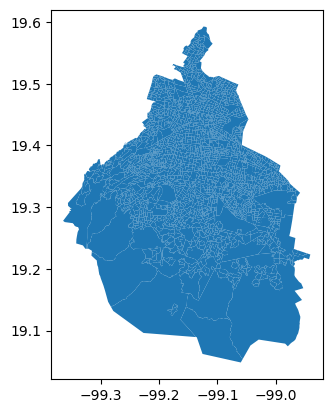

In [102]:
agebs.plot()

<Axes: >

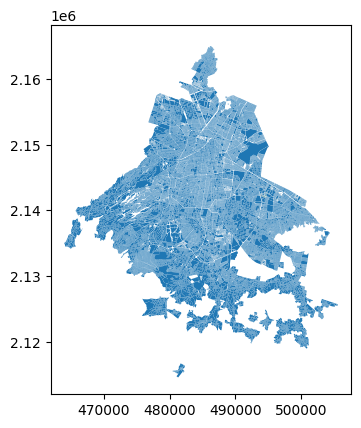

In [103]:
trans_cdmx.plot()

In [104]:
trans_cdmx.head()

,CVEGEO,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,Cablebus,geometry
0,0900200010542046,0,0,0,0,0,0,0,1,0,0,"POLYGON ((482971.116 2152877.401, 483008.421 2..."
1,0900200010542047,0,0,0,0,0,0,0,1,0,0,"POLYGON ((482966.653 2152906.877, 482995.891 2..."
2,0900200010542048,0,0,0,0,0,1,0,1,0,0,"POLYGON ((482984.895 2152945.837, 482990.683 2..."
3,0900200010542050,0,0,0,0,1,1,0,1,0,0,"POLYGON ((482954.55 2152981.684, 482961.318 21..."
4,0900200010542049,0,0,0,0,1,1,0,1,0,0,"POLYGON ((482970.57 2152964.292, 482976.134 21..."


In [105]:
new_column = []
for values in trans_cdmx['CVEGEO']:
    match = values[0:13]
    new_column.append(match)

In [106]:
trans_cdmx['CVEGEO_02'] = new_column

/home/gabymhuidobro/.pyenv/versions/3.10.6/envs/le-wagon-rus/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [107]:
trans_cdmx.columns

Index(['CVEGEO', 'Metro', 'Suburbano', 'Metrobus', 'Tren_Liger', 'Trolebus',
       'RTP', 'Trole_elev', 'T_Concesio', 'Ecobici', 'Cablebus', 'geometry',
       'CVEGEO_02'],
      dtype='object')

In [108]:
trans_CVEGEO = trans_cdmx[['CVEGEO_02', 'Metro', 'Suburbano', 'Metrobus', 'Tren_Liger', 'Trolebus','RTP', 'Trole_elev', 'T_Concesio', 'Ecobici', 'Cablebus']].groupby(by='CVEGEO_02').sum()

In [109]:
trans_CVEGEO.reset_index(inplace=True)

In [110]:
agebs.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,090110471,09,011,0471,"POLYGON ((-98.99797 19.32698, -98.99294 19.326..."
1,090101326,09,010,1326,"POLYGON ((-99.27232 19.32381, -99.27222 19.323..."
2,090090539,09,009,0539,"POLYGON ((-99.10364 19.19843, -99.1034 19.1980..."
3,090090524,09,009,0524,"POLYGON ((-99.05209 19.21711, -99.052 19.21688..."
4,090090115,09,009,0115,"POLYGON ((-99.14474 19.13402, -99.14467 19.134..."


In [111]:
trans_CVEGEO.head()

,CVEGEO_02,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,Cablebus
0,0900200010010,0,0,0,0,0,0,0,25,0,0
1,0900200010025,12,0,24,0,23,25,0,20,0,0
2,090020001003A,1,0,0,0,17,16,0,27,0,0
3,0900200010044,40,0,14,0,41,41,0,44,0,0
4,0900200010097,21,0,0,0,22,20,0,22,0,0


In [112]:
agebs.nunique()

CVEGEO      2453
CVE_ENT        1
CVE_MUN       16
CVE_AGEB    1960
geometry    2453
dtype: int64

In [113]:
trans_CVEGEO.rename(columns={'CVEGEO_02':'CVEGEO'},inplace=True)

In [114]:
trans_CVEGEO.nunique()

CVEGEO        2432
Metro           52
Suburbano       15
Metrobus        42
Tren_Liger      35
Trolebus        35
RTP             53
Trole_elev      16
T_Concesio      58
Ecobici         32
Cablebus        13
dtype: int64

In [115]:
agebs_trans_cdmx = pd.merge(agebs, trans_CVEGEO,how= 'left', on=['CVEGEO'])

In [116]:
agebs_trans_cdmx.isna().sum()

CVEGEO         0
CVE_ENT        0
CVE_MUN        0
CVE_AGEB       0
geometry       0
Metro         23
Suburbano     23
Metrobus      23
Tren_Liger    23
Trolebus      23
RTP           23
Trole_elev    23
T_Concesio    23
Ecobici       23
Cablebus      23
dtype: int64

In [117]:
agebs_trans_cdmx.fillna('0', inplace=True)

/tmp/ipykernel_97577/1369560054.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  agebs_trans_cdmx.fillna('0', inplace=True)


In [118]:
agebs_trans_cdmx[30:35]

,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,geometry,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,Cablebus
30,0901000011330,09,010,1330,"POLYGON ((-99.253 19.33714, -99.2528 19.33706,...",0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,0.0,0.0
31,090100001181A,09,010,181A,"POLYGON ((-99.21974 19.35077, -99.22129 19.350...",0.0,0.0,0.0,0.0,0.0,26.0,0.0,22.0,0.0,0.0
32,0901000011684,09,010,1684,"POLYGON ((-99.24084 19.33862, -99.24059 19.338...",0.0,0.0,0.0,0.0,0.0,4.0,0.0,21.0,0.0,0.0
33,0901000011665,09,010,1665,"POLYGON ((-99.23658 19.351, -99.23659 19.35091...",0.0,0.0,0.0,0.0,0.0,10.0,0.0,8.0,0.0,0.0
34,0901000010578,09,010,0578,"POLYGON ((-99.21313 19.37134, -99.21302 19.370...",0.0,0.0,0.0,0.0,0.0,34.0,0.0,29.0,0.0,0.0


#### **agebs_trans_cdmx + INV** | agebs_trans_INV_cdmx

In [119]:
INV_pob.head()

,VIVTOT
CVEGEO,
0900200010010,894
0900200010025,1851
090020001003A,1249
0900200010044,1440
0900200010097,616


In [120]:
agebs_trans_cdmx.shape

(2453, 15)

In [121]:
agebs_trans_INV_cdmx = pd.merge(agebs_trans_cdmx, INV_pob,how= 'left', on=['CVEGEO'])

In [122]:
agebs_trans_INV_cdmx.fillna('0', inplace=True)

/tmp/ipykernel_97577/2016309664.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  agebs_trans_INV_cdmx.fillna('0', inplace=True)


In [123]:
agebs_trans_INV_cdmx.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'geometry', 'Metro',
       'Suburbano', 'Metrobus', 'Tren_Liger', 'Trolebus', 'RTP', 'Trole_elev',
       'T_Concesio', 'Ecobici', 'Cablebus', 'VIVTOT'],
      dtype='object')

In [124]:
agebs_trans_INV_cdmx = agebs_trans_INV_cdmx.astype({'Metro':'int64',
       'Suburbano':'int64', 'Metrobus':'int64', 'Tren_Liger':'int64', 'Trolebus':'int64', 'RTP':'int64', 'Trole_elev':'int64',
       'T_Concesio':'int64', 'Ecobici':'int64', 'Cablebus':'int64', 'VIVTOT':'int64'})

In [125]:
agebs_trans_INV_cdmx['VIVTOT'].max()

np.int64(8684)

#### **areas verdes + espacio p[ublico** | AVU_EP_cdmx

In [126]:
AVU_cdmx.nunique()

CVE_ENT        1
ALCALDIA      16
CVE_COL     1814
T_AV_M2     1335
geometry    1814
dtype: int64

In [127]:
esppub_cdmx.nunique()

CVE_ENT         1
ALCALDIA       16
CVE_COL      1814
NOM_COL      1743
M2_ESPPUB    1278
geometry     1814
dtype: int64

In [128]:
esppub_cdmx = esppub_cdmx[['CVE_COL','M2_ESPPUB']]

In [129]:
result = pd.merge(AVU_cdmx, esppub_cdmx,how= 'outer', on=['CVE_COL'])

In [130]:
AVU_EP_cdmx = result[['CVE_ENT', 'ALCALDIA', 'CVE_COL', 'T_AV_M2', 'M2_ESPPUB','geometry']]

In [131]:
AVU_EP_cdmx

,CVE_ENT,ALCALDIA,CVE_COL,T_AV_M2,M2_ESPPUB,geometry
0,09,AZCAPOTZALCO,02-001,5598.16,0.000000,"POLYGON ((483311.618 2153254.848, 483332.006 2..."
1,09,AZCAPOTZALCO,02-002,3521.13,0.000000,"POLYGON ((484406.956 2153012.331, 484401.132 2..."
2,09,AZCAPOTZALCO,02-003,6868.27,0.000000,"POLYGON ((479361.336 2154537.765, 479378.533 2..."
3,09,AZCAPOTZALCO,02-005,16817.30,3155.005769,"POLYGON ((480275.324 2152244.351, 480267.968 2..."
4,09,AZCAPOTZALCO,02-006,4504.14,6032.212895,"POLYGON ((484061.118 2152622.284, 484061.678 2..."
...,...,...,...,...,...,...
1809,09,VENUSTIANO CARRANZA,17-082,22012.60,12806.681860,"POLYGON ((489540.363 2148472.511, 489650.894 2..."
1810,09,VENUSTIANO CARRANZA,17-083,13536.50,6292.244562,"POLYGON ((487005.967 2149240.615, 487024.199 2..."
1811,09,VENUSTIANO CARRANZA,17-084,18876.60,16393.422050,"POLYGON ((487277.125 2150400.449, 487374.774 2..."
1812,09,VENUSTIANO CARRANZA,17-085,148273.00,282252.225350,"POLYGON ((491930.096 2150542.935, 491946.526 2..."


In [132]:
AVU_EP_cdmx

,CVE_ENT,ALCALDIA,CVE_COL,T_AV_M2,M2_ESPPUB,geometry
0,09,AZCAPOTZALCO,02-001,5598.16,0.000000,"POLYGON ((483311.618 2153254.848, 483332.006 2..."
1,09,AZCAPOTZALCO,02-002,3521.13,0.000000,"POLYGON ((484406.956 2153012.331, 484401.132 2..."
2,09,AZCAPOTZALCO,02-003,6868.27,0.000000,"POLYGON ((479361.336 2154537.765, 479378.533 2..."
3,09,AZCAPOTZALCO,02-005,16817.30,3155.005769,"POLYGON ((480275.324 2152244.351, 480267.968 2..."
4,09,AZCAPOTZALCO,02-006,4504.14,6032.212895,"POLYGON ((484061.118 2152622.284, 484061.678 2..."
...,...,...,...,...,...,...
1809,09,VENUSTIANO CARRANZA,17-082,22012.60,12806.681860,"POLYGON ((489540.363 2148472.511, 489650.894 2..."
1810,09,VENUSTIANO CARRANZA,17-083,13536.50,6292.244562,"POLYGON ((487005.967 2149240.615, 487024.199 2..."
1811,09,VENUSTIANO CARRANZA,17-084,18876.60,16393.422050,"POLYGON ((487277.125 2150400.449, 487374.774 2..."
1812,09,VENUSTIANO CARRANZA,17-085,148273.00,282252.225350,"POLYGON ((491930.096 2150542.935, 491946.526 2..."


In [133]:
AVU_EP_cdmx.to_csv('../clean_datasets/avu_ep.csv')

#### **transporte + infraestructura urbana**

In [134]:
INV_IU.shape

(2431, 109)

In [135]:
agebs_trans_INV_cdmx.shape

(2453, 16)

In [136]:
agebs_trans_INV_cdmx = pd.merge(agebs_trans_INV_cdmx, INV_IU,how= 'left', on=['CVEGEO'])

In [137]:
agebs_trans_INV_cdmx.fillna(0, inplace=True)

In [138]:
agebs_trans_INV_cdmx.isnull().sum()

CVEGEO          0
CVE_ENT         0
CVE_MUN         0
CVE_AGEB        0
geometry        0
               ..
PUESAMBU_C_2    0
PUESAMBU_C_3    0
PUESAMBU_C_7    0
PUESAMBU_C_8    0
PUESAMBU_C_9    0
Length: 124, dtype: int64

In [139]:
agebs_trans_INV_cdmx.shape

(2453, 124)

In [140]:
agebs_trans_INV_cdmx.columns[:30]

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'geometry', 'Metro',
       'Suburbano', 'Metrobus', 'Tren_Liger', 'Trolebus', 'RTP', 'Trole_elev',
       'T_Concesio', 'Ecobici', 'Cablebus', 'VIVTOT', 'RECUCALL_C_1',
       'RECUCALL_C_2', 'RECUCALL_C_3', 'RECUCALL_C_7', 'RECUCALL_C_8',
       'RECUCALL_C_9', 'RAMPAS_C_1', 'RAMPAS_C_2', 'RAMPAS_C_3', 'RAMPAS_C_7',
       'RAMPAS_C_8', 'RAMPAS_C_9', 'PASOPEAT_C_1', 'PASOPEAT_C_2'],
      dtype='object')

#### **poblacion_n + transporte y Infra urbana** | agebs_trans_pob

In [141]:
trans_INV = agebs_trans_INV_cdmx.drop(columns= ['CVE_ENT', 'CVE_MUN', 'CVE_AGEB', 'geometry'])

In [142]:
trans_INV

,CVEGEO,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,...,PUESSEMI_C_3,PUESSEMI_C_7,PUESSEMI_C_8,PUESSEMI_C_9,PUESAMBU_C_1,PUESAMBU_C_2,PUESAMBU_C_3,PUESAMBU_C_7,PUESAMBU_C_8,PUESAMBU_C_9
0,090110471,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,090101326,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,090090539,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,090090524,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,090090115,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0900700012564,10,0,0,0,0,25,2,30,0,...,28.0,0.0,0.0,0.0,0.0,13.0,22.0,0.0,0.0,0.0
2449,0900700012615,7,0,0,0,0,14,0,12,0,...,22.0,0.0,0.0,0.0,0.0,8.0,18.0,0.0,0.0,0.0
2450,0900700012969,0,0,0,0,0,13,0,15,0,...,21.0,0.0,0.0,0.0,0.0,2.0,20.0,0.0,0.0,0.0
2451,0900700013721,0,0,0,0,0,26,0,41,0,...,21.0,16.0,0.0,1.0,0.0,9.0,17.0,16.0,0.0,1.0


In [143]:
trans_INV[15:30]

,CVEGEO,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,...,PUESSEMI_C_3,PUESSEMI_C_7,PUESSEMI_C_8,PUESSEMI_C_9,PUESAMBU_C_1,PUESAMBU_C_2,PUESAMBU_C_3,PUESAMBU_C_7,PUESAMBU_C_8,PUESAMBU_C_9
15,090121227,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,090131281,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,090111198,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,090111179,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,090111107,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,090110838,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,090040335,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0901000011716,0,0,0,0,0,0,0,43,0,...,21.0,0.0,0.0,3.0,1.0,6.0,35.0,0.0,0.0,3.0
23,0901000012150,22,0,0,0,0,12,0,14,0,...,20.0,0.0,0.0,0.0,0.0,4.0,18.0,0.0,0.0,0.0
24,0901000011133,27,0,25,0,2,12,0,33,0,...,28.0,1.0,1.0,0.0,1.0,9.0,23.0,1.0,1.0,0.0


In [144]:
trans_INV.shape

(2453, 120)

In [145]:
poblacion = pd.read_csv('../raw_data/poblacion_n.csv')

In [146]:
#poblacion['com_comidas'] = poblacion['com_24'] + poblacion['com_25'] + poblacion['com_26'] + poblacion['com_27'] + poblacion['com_28'] + poblacion['com_30']

In [147]:
#poblacion['com_abarrotes'] = poblacion['com_08'] + poblacion['com_09'] + poblacion['com_10'] + poblacion['com_17']

In [148]:
poblacion.drop(columns=['Unnamed: 0'], inplace=True)
#'com_24','com_25','com_26','com_27','com_28','com_30','com_08','com_09','com_10','com_17'

In [149]:
poblacion.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'geometry',
       'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_3A5', 'P_6A11', 'P_12A14',
       'P_15A17', 'P_18A24', 'P_25A59', 'P_60YMAS', 'P_0A2_F', 'P_3A5_F',
       'P_6A11_F', 'P_12A14_F', 'P_15A17_F', 'P_18A24_F', 'P_25A59_F',
       'P_60YMAS_F', 'P_0A2_M', 'P_3A5_M', 'P_6A11_M', 'P_12A14_M',
       'P_15A17_M', 'P_18A24_M', 'P_25A59_M', 'P_60YMAS_M', 'P3YM_HLI',
       'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M',
       'P3HLI_HE', 'P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE',
       'P5_HLI_HE', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M',
       'PCON_DISC', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'PEA', 'PEA_F',
       'PEA_M', 'HOGJEF_F', 'HOGJEF_M', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI',
       'POBREZA', 'POBREZAEX', 'com_org_religiosas', 'com_perfumerias',
       'com_zapaterias', 'com_naturistas', 'com_revistas',
       'com_med_especializada', 'com_consultorios', 'com_herrer

In [150]:
poblacion_cdmx = poblacion[['CVEGEO','POBTOT', 'POBFEM', 'POBMAS', 
                            'P_0A2', 'P_3A5', 'P_6A11', 'P_12A14',
                            'P_15A17', 'P_18A24', 'P_25A59', 'P_60YMAS', 'P_0A2_F', 'P_3A5_F',
                            'P_6A11_F', 'P_12A14_F', 'P_15A17_F', 'P_18A24_F', 'P_25A59_F',
                            'P_60YMAS_F', 'P_0A2_M', 'P_3A5_M', 'P_6A11_M', 'P_12A14_M',
                            'P_15A17_M', 'P_18A24_M', 'P_25A59_M', 'P_60YMAS_M', 
                            
                            'P3YM_HLI',
                            'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M',
                            'P3HLI_HE', 'P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE',
                            'P5_HLI_HE', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M',
       
                            'PCON_DISC', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'PEA', 'PEA_F','PEA_M', 'HOGJEF_F', 'HOGJEF_M', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI',
       
                            'POBREZA', 'POBREZAEX', 'com_org_religiosas', 'com_perfumerias',
                            'com_zapaterias', 'com_naturistas', 'com_revistas',
                            'com_med_especializada', 'com_consultorios', 'com_herrerias',
                            'com_impresiones', 'com_purificadoras', 'com_art_hogar',
                            'com_computadoras', 'com_cajeros', 'com_neverias', 'com_papelerias',
                            'com_art_limpieza', 'com_dulcerias', 'com_refacciones', 'con_viveros',
                            'com_regalos', 'com_ropa', 'com_telefonia', 'com_ferreterias',
                            'com_dentistas', 'com_tortillerias', 'com_farmacias', 'com_lavanderias',
                            'com_panaderias', 'com_mecanicos', 'com_peluquerias', 'com_comidas',
                            'com_carnicerias', 'com_abarrotes']]

In [151]:
poblacion_cdmx.shape

(2431, 91)

debenr[an ser 208 columnas y 2453 rows al final

In [152]:
agebs_trans_pob = pd.merge(trans_INV, poblacion_cdmx,how= 'left', on=['CVEGEO'])

In [153]:
agebs_trans_pob.shape

(2453, 210)

In [154]:
agebs_trans_pob.fillna('0', inplace=True)

/tmp/ipykernel_97577/696238010.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  agebs_trans_pob.fillna('0', inplace=True)


In [155]:
agebs_trans_pob.dtypes

CVEGEO             object
Metro               int64
Suburbano           int64
Metrobus            int64
Tren_Liger          int64
                    ...  
com_mecanicos      object
com_peluquerias    object
com_comidas        object
com_carnicerias    object
com_abarrotes      object
Length: 210, dtype: object

In [156]:
agebs_trans_pob.set_index('CVEGEO', inplace= True)

In [157]:
agebs_trans_pob_IU = agebs_trans_pob.astype('int64').reset_index()

In [158]:
agebs_trans_pob_IU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Columns: 210 entries, CVEGEO to com_abarrotes
dtypes: int64(209), object(1)
memory usage: 3.9+ MB


In [159]:
agebs_trans_pob_IU.dtypes

CVEGEO             object
Metro               int64
Suburbano           int64
Metrobus            int64
Tren_Liger          int64
                    ...  
com_mecanicos       int64
com_peluquerias     int64
com_comidas         int64
com_carnicerias     int64
com_abarrotes       int64
Length: 210, dtype: object

#### DATASET FINAL | agebs_trans_pob + rus_servicios | data_rus

In [160]:
agebs_trans_pob_IU.dtypes

CVEGEO             object
Metro               int64
Suburbano           int64
Metrobus            int64
Tren_Liger          int64
                    ...  
com_mecanicos       int64
com_peluquerias     int64
com_comidas         int64
com_carnicerias     int64
com_abarrotes       int64
Length: 210, dtype: object

In [161]:
rus_servicios_y.dtypes

CVEGEO                    object
salud_count              float64
deportivos_count         float64
infraestructura_count    float64
comercios_count          float64
educacion_count          float64
pp_count                 float64
guarderias                 int64
vio_index                float64
dtype: object

In [162]:
data_rus = pd.merge(agebs_trans_pob_IU, rus_servicios_y,how= 'left', on=['CVEGEO'])

In [163]:
data_rus = data_rus.drop(columns=['RECUCALL_C_7', 'RAMPAS_C_7',
                                  'PASOPEAT_C_7', 'BANQUETA_C_7', 
                                  'GUARNICI_C_7', 'CICLOVIA_C_7', 
                                  'CICLOCAR_C_7','ALUMPUB_C_7', 
                                  'LETRERO_C_7', 'ARBOLES_C_7', 
                                  'SEMAPEAT_C_7', 'SEMAAUDI_C_7',
                                  'ESTABICI_C_7', 'DRENAJEP_C_7', 
                                  'ACESOPER_C_7', 'ACESOAUT_C_7', 
                                  'PUESSEMI_C_7','PUESAMBU_C_7',
                                  'RECUCALL_C_8', 'RAMPAS_C_8',
                                  'PASOPEAT_C_8', 'BANQUETA_C_8', 
                                  'GUARNICI_C_8', 'CICLOVIA_C_8', 
                                  'CICLOCAR_C_8','ALUMPUB_C_8', 
                                  'LETRERO_C_8', 'ARBOLES_C_8', 
                                  'SEMAPEAT_C_8', 'SEMAAUDI_C_8',
                                  'ESTABICI_C_8', 'DRENAJEP_C_8', 
                                  'ACESOPER_C_8', 'ACESOAUT_C_8', 
                                  'PUESSEMI_C_8','PUESAMBU_C_8',
                                  'RECUCALL_C_9', 'RAMPAS_C_9',
                                  'PASOPEAT_C_9', 'BANQUETA_C_9', 
                                  'GUARNICI_C_9', 'CICLOVIA_C_9', 
                                  'CICLOCAR_C_9','ALUMPUB_C_9', 
                                  'LETRERO_C_9', 'ARBOLES_C_9', 
                                  'SEMAPEAT_C_9', 'SEMAAUDI_C_9',
                                  'ESTABICI_C_9', 'DRENAJEP_C_9', 
                                  'ACESOPER_C_9', 'ACESOAUT_C_9', 
                                  'PUESSEMI_C_9','PUESAMBU_C_9'])

In [164]:
data_rus.shape

(2453, 164)

In [165]:
data_rus.fillna(0, inplace=True)

In [166]:
data_rus.dtypes

CVEGEO              object
Metro                int64
Suburbano            int64
Metrobus             int64
Tren_Liger           int64
                    ...   
comercios_count    float64
educacion_count    float64
pp_count           float64
guarderias           int64
vio_index          float64
Length: 164, dtype: object

In [167]:
data_rus.shape

(2453, 164)

In [168]:
data_rus.isna().sum().sort_values(ascending= True)

CVEGEO             0
Metro              0
Suburbano          0
Metrobus           0
Tren_Liger         0
                  ..
comercios_count    0
educacion_count    0
pp_count           0
guarderias         0
vio_index          0
Length: 164, dtype: int64

In [169]:
data_rus.describe()

,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,Cablebus,...,com_carnicerias,com_abarrotes,salud_count,deportivos_count,infraestructura_count,comercios_count,educacion_count,pp_count,guarderias,vio_index
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,...,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,8.084794,0.080717,2.799022,0.665715,1.767631,11.277212,0.086425,21.216062,1.042805,0.090094,...,5.326947,26.493274,0.317570,0.013045,0.468406,0.979209,3.430086,0.086017,1.039136,262.866645
std,11.696829,1.072042,7.034578,3.985285,5.307646,11.041880,1.025705,11.246741,4.230247,0.848924,...,11.088363,67.040470,0.702946,0.120464,0.953828,1.473798,4.119408,0.712522,1.432586,180.299965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,137.087855
50%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,22.000000,0.000000,0.000000,...,2.000000,19.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,228.681284
75%,17.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,28.000000,0.000000,0.000000,...,6.000000,34.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,2.000000,353.526453
max,51.000000,22.000000,48.000000,44.000000,46.000000,75.000000,25.000000,85.000000,35.000000,19.000000,...,225.000000,2689.000000,10.000000,2.000000,7.000000,20.000000,51.000000,12.000000,11.000000,1369.792320


In [170]:
data_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Columns: 164 entries, CVEGEO to vio_index
dtypes: float64(7), int64(156), object(1)
memory usage: 3.1+ MB


In [174]:
data_rus.isnull().sum().sort_values(ascending=True)

CVEGEO             0
Metro              0
Suburbano          0
Metrobus           0
Tren_Liger         0
                  ..
comercios_count    0
educacion_count    0
pp_count           0
guarderias         0
vio_index          0
Length: 164, dtype: int64

In [171]:
data_rus[22:]

,CVEGEO,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,...,com_carnicerias,com_abarrotes,salud_count,deportivos_count,infraestructura_count,comercios_count,educacion_count,pp_count,guarderias,vio_index
22,0901000011716,0,0,0,0,0,0,0,43,0,...,6,40,0.0,0.0,1.0,2.0,2.0,0.0,1,359.186295
23,0901000012150,22,0,0,0,0,12,0,14,0,...,11,36,0.0,0.0,1.0,1.0,3.0,0.0,3,246.256115
24,0901000011133,27,0,25,0,2,12,0,33,0,...,0,4,2.0,0.0,0.0,1.0,12.0,0.0,0,121.872161
25,0901000011307,0,0,0,0,0,14,0,26,0,...,1,4,0.0,0.0,0.0,2.0,16.0,0.0,0,164.371686
26,0901000010281,0,0,0,0,0,3,0,3,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,13.463207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0900700012564,10,0,0,0,0,25,2,30,0,...,17,71,1.0,0.0,1.0,1.0,7.0,0.0,0,527.040078
2449,0900700012615,7,0,0,0,0,14,0,12,0,...,7,68,0.0,0.0,0.0,1.0,2.0,0.0,0,602.158782
2450,0900700012969,0,0,0,0,0,13,0,15,0,...,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0,197.394420
2451,0900700013721,0,0,0,0,0,26,0,41,0,...,4,23,0.0,0.0,0.0,1.0,0.0,0.0,1,353.526453


In [263]:
#data_rus.to_csv('../clean_datasets/data_RUS_absolutos.csv')

#### data prorrateada

In [342]:
ageb_manzanas =gpd.read_file('../raw_data/rus_gdf/rus_gdf.shp')

In [343]:
ageb_manzanas = ageb_manzanas[['CVEGEO','manzanas']]

In [344]:
data_rus.columns[149:200]

Index(['com_lavanderias', 'com_panaderias', 'com_mecanicos', 'com_peluquerias',
       'com_comidas', 'com_carnicerias', 'com_abarrotes', 'salud_count',
       'deportivos_count', 'infraestructura_count', 'comercios_count',
       'educacion_count', 'pp_count', 'guarderias', 'vio_index'],
      dtype='object')

In [345]:
rus_manzana = data_rus[['CVEGEO', 'Metro', 'Suburbano', 'Metrobus', 'Tren_Liger', 'Trolebus',
                        'RTP', 'Trole_elev', 'T_Concesio', 'Ecobici', 'Cablebus',
                        'RECUCALL_C_1', 'RECUCALL_C_2', 'RECUCALL_C_3', 'RAMPAS_C_1',
                        'RAMPAS_C_2', 'RAMPAS_C_3', 'PASOPEAT_C_1', 'PASOPEAT_C_2',
                        'PASOPEAT_C_3', 'BANQUETA_C_1', 'BANQUETA_C_2', 'BANQUETA_C_3',
                        'GUARNICI_C_1', 'GUARNICI_C_2', 'GUARNICI_C_3', 'CICLOVIA_C_1',
                        'CICLOVIA_C_2', 'CICLOVIA_C_3', 'CICLOCAR_C_1', 'CICLOCAR_C_2',
                        'CICLOCAR_C_3', 'ALUMPUB_C_1', 'ALUMPUB_C_2', 'ALUMPUB_C_3',
                        'LETRERO_C_1', 'LETRERO_C_2', 'LETRERO_C_3', 'ARBOLES_C_1',
                        'ARBOLES_C_2', 'ARBOLES_C_3', 'SEMAPEAT_C_1', 'SEMAPEAT_C_2',
                        'SEMAPEAT_C_3', 'SEMAAUDI_C_1', 'SEMAAUDI_C_2', 'SEMAAUDI_C_3',
                        'ESTABICI_C_1', 'ESTABICI_C_2', 'ESTABICI_C_3', 'DRENAJEP_C_1', 'DRENAJEP_C_2', 'DRENAJEP_C_3',
                        'ACESOPER_C_1', 'ACESOPER_C_2', 'ACESOPER_C_3', 'ACESOAUT_C_1',
                        'ACESOAUT_C_2', 'ACESOAUT_C_3', 'PUESSEMI_C_1', 'PUESSEMI_C_2',
                        'PUESSEMI_C_3', 'PUESAMBU_C_1', 'PUESAMBU_C_2', 'PUESAMBU_C_3',
                        'salud_count',
                        'deportivos_count', 'infraestructura_count', 'comercios_count',
                        'educacion_count', 'pp_count', 'guarderias']]

rus_manzana = pd.merge(rus_manzana, ageb_manzanas,how= 'left', on=['CVEGEO'])

In [346]:
rus_vivienda = data_rus[['CVEGEO','VIVTOT','HOGJEF_F', 'HOGJEF_M', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M']]

rus_poblacion= data_rus[['CVEGEO','POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_3A5', 'P_6A11', 'P_12A14', 
                         'P_15A17', 'P_18A24', 'P_25A59', 'P_60YMAS', 'P_0A2_F', 'P_3A5_F', 
                         'P_6A11_F', 'P_12A14_F', 'P_15A17_F', 'P_18A24_F', 'P_25A59_F', 
                         'P_60YMAS_F', 'P_0A2_M', 'P_3A5_M', 'P_6A11_M', 'P_12A14_M', 
                         'P_15A17_M', 'P_18A24_M', 'P_25A59_M', 'P_60YMAS_M', 'P3YM_HLI', 
                         'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M', 
                         'P3HLI_HE','P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE', 
                         'P5_HLI_HE', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M', 
                         'PCON_DISC', 'PEA', 'PEA_F', 
                         'PEA_M']]



In [347]:
rus_otros = data_rus[['CVEGEO','POBREZA', 'POBREZAEX','vio_index']]

In [348]:
columns_to_divide = rus_poblacion.columns.tolist()[2:]

rus_poblacion[columns_to_divide] = rus_poblacion[columns_to_divide].div(rus_poblacion['POBTOT'], axis=0)

rus_poblacion.fillna(0, inplace=True)

rus_poblacion.drop(columns='POBTOT', inplace= True)

/tmp/ipykernel_97577/779141275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_poblacion[columns_to_divide] = rus_poblacion[columns_to_divide].div(rus_poblacion['POBTOT'], axis=0)
/tmp/ipykernel_97577/779141275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_poblacion.fillna(0, inplace=True)
/tmp/ipykernel_97577/779141275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [349]:
rus_poblacion.shape

(2453, 47)

In [288]:
rus_poblacion.describe()

,POBFEM,POBMAS,P_0A2,P_3A5,P_6A11,P_12A14,P_15A17,P_18A24,P_25A59,P_60YMAS,...,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,...,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,0.511365,0.464165,0.022312,0.028706,0.067034,0.033182,0.034773,0.034773,0.594756,0.168565,...,0.017418,0.007756,0.007298,0.049078,0.100430,0.097913,0.103409,0.541053,0.247250,0.293115
std,0.080570,0.073249,0.011292,0.012978,0.025678,0.013942,0.013683,0.013683,0.098323,0.064283,...,0.023896,0.012292,0.011546,0.020795,0.087370,0.083547,0.093338,0.096275,0.051573,0.051278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.513884,0.464385,0.014670,0.020522,0.050228,0.024296,0.026731,0.026731,0.567379,0.127660,...,0.005714,0.001751,0.001488,0.036905,0.052408,0.051729,0.053395,0.522497,0.230201,0.287885
50%,0.522898,0.475103,0.023037,0.029788,0.069277,0.034925,0.036815,0.036815,0.587990,0.165509,...,0.011962,0.004815,0.004532,0.049706,0.076493,0.074751,0.078261,0.546363,0.248834,0.298673
75%,0.532392,0.483511,0.030073,0.037606,0.083994,0.042807,0.044444,0.044444,0.619604,0.210070,...,0.022113,0.009953,0.009355,0.061876,0.116944,0.114583,0.119919,0.574208,0.271334,0.308756
max,0.647059,1.000000,0.116438,0.142857,0.277778,0.121622,0.112150,0.112150,1.000000,0.376744,...,0.385429,0.200548,0.182922,0.181818,1.227273,1.090909,1.636364,0.851129,0.395349,0.507187


In [350]:
columns_to_divide = rus_vivienda.columns.tolist()[2:]

rus_vivienda[columns_to_divide] = rus_vivienda[columns_to_divide].div(rus_vivienda['VIVTOT'], axis=0)

rus_vivienda.fillna(0, inplace=True)

rus_vivienda.drop(columns='VIVTOT', inplace= True)

/tmp/ipykernel_97577/2972888879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_vivienda[columns_to_divide] = rus_vivienda[columns_to_divide].div(rus_vivienda['VIVTOT'], axis=0)
/tmp/ipykernel_97577/2972888879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_vivienda.fillna(0, inplace=True)
/tmp/ipykernel_97577/2972888879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [351]:
rus_vivienda.shape

(2453, 9)

In [352]:
columns_to_divide = rus_manzana.columns.tolist()[1:-1]

rus_manzana[columns_to_divide] = rus_manzana[columns_to_divide].div(rus_manzana['manzanas'], axis=0)

rus_manzana.fillna(0, inplace=True)

rus_manzana.drop(columns='manzanas', inplace= True)

In [353]:
rus_manzana.shape

(2453, 72)

In [354]:
rus_01 = pd.merge(rus_manzana, rus_vivienda,how= 'left', on=['CVEGEO'])

In [355]:
rus_01.shape

(2453, 80)

In [356]:
rus_02 = pd.merge(rus_01, rus_poblacion,how= 'left', on=['CVEGEO'])

In [357]:
rus_02.shape

(2453, 126)

In [358]:
rus_03 = pd.merge(rus_02, rus_otros,how= 'left', on=['CVEGEO'])

In [359]:
data_rus_ave = rus_03

In [360]:
data_rus_ave.isnull().sum().sort_values(ascending = True)

CVEGEO        0
Metro         0
Suburbano     0
Metrobus      0
Tren_Liger    0
             ..
PEA_F         0
PEA_M         0
POBREZA       0
POBREZAEX     0
vio_index     0
Length: 129, dtype: int64

In [361]:
data_rus_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Columns: 129 entries, CVEGEO to vio_index
dtypes: float64(126), int64(2), object(1)
memory usage: 2.4+ MB


In [362]:
data_rus_ave.describe()

,Metro,Suburbano,Metrobus,Tren_Liger,Trolebus,RTP,Trole_elev,T_Concesio,Ecobici,Cablebus,...,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PEA,PEA_F,PEA_M,POBREZA,POBREZAEX,vio_index
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,...,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,0.327985,0.003601,0.125361,0.025492,0.073882,0.430493,0.003300,0.795293,0.052730,0.003002,...,0.017418,0.007756,0.007298,0.049078,0.541053,0.247250,0.293115,1.844272,0.969425,262.866645
std,0.432959,0.047945,0.296088,0.145832,0.208533,0.368757,0.038072,0.280093,0.205249,0.029621,...,0.023896,0.012292,0.011546,0.020795,0.096275,0.051573,0.051278,1.030630,0.181424,180.299965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675676,0.000000,0.000000,...,0.005714,0.001751,0.001488,0.036905,0.522497,0.230201,0.287885,1.000000,1.000000,137.087855
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.404762,0.000000,0.906250,0.000000,0.000000,...,0.011962,0.004815,0.004532,0.049706,0.546363,0.248834,0.298673,2.000000,1.000000,228.681284
75%,0.857143,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,...,0.022113,0.009953,0.009355,0.061876,0.574208,0.271334,0.308756,3.000000,1.000000,353.526453
max,2.000000,1.000000,2.500000,1.096774,1.181818,2.000000,1.000000,2.500000,1.125000,0.666667,...,0.385429,0.200548,0.182922,0.181818,0.851129,0.395349,0.507187,5.000000,2.000000,1369.792320


In [363]:
data_rus_ave.to_csv('../clean_datasets/data_RUS.csv')

In [364]:
data_rus_ave.columns

Index(['CVEGEO', 'Metro', 'Suburbano', 'Metrobus', 'Tren_Liger', 'Trolebus',
       'RTP', 'Trole_elev', 'T_Concesio', 'Ecobici',
       ...
       'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M', 'PCON_DISC', 'PEA', 'PEA_F',
       'PEA_M', 'POBREZA', 'POBREZAEX', 'vio_index'],
      dtype='object', length=129)

In [365]:
data_rus['GRAPROES_F']

0         0
1         0
2         0
3         0
4         0
       ... 
2448    300
2449    227
2450    179
2451    381
2452    413
Name: GRAPROES_F, Length: 2453, dtype: int64

# pushing

In [ ]:
!git add RUS_preprocesing_model.ipynb

!git commit -m 'shap on model'

!git push origin main

#### pob por municipio

In [173]:
ageb_pob_FM = agebs_trans_pob[['CVEGEO','POBTOT','POBFEM', 'POBMAS']]
ageb_pob_FM[20:24]

KeyError: "['CVEGEO'] not in index"

In [ ]:
new_column = []
for values in ageb_pob_FM['CVEGEO']:
    match = values[0:5]
    new_column.append(match)

In [ ]:
ageb_pob_FM['ENTMUN'] = new_column

In [ ]:
ageb_pob_FM.dtypes

In [ ]:
ageb_pob_FM = ageb_pob_FM.astype({'POBTOT':'int64','POBFEM':'int64','POBMAS':'int64'})

In [ ]:
ageb_pob_FM.columns

In [ ]:
ageb_pob_FM = ageb_pob_FM[['POBTOT', 'POBFEM', 'POBMAS', 'ENTMUN']].groupby(by='ENTMUN').sum().reset_index()

In [ ]:
new_column = []
for values in ageb_pob_FM['ENTMUN']:
    match = values[2:5]
    new_column.append(match)

In [ ]:
ageb_pob_FM['ENTMUN'] = new_column

In [ ]:
ageb_pob_FM.dtypes

In [ ]:
#ageb_pob_FM.to_csv('../clean_datasets/ageb_pob_FM.csv')

In [ ]:
ageb_pob_FM['resta'] = ageb_pob_FM['POBTOT']-ageb_pob_FM['POBFEM']

In [ ]:
ageb_pob_FM[20:30]